# Tarea 3 - Raimundo Herrera

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, multivariate_normal
from scipy.special import digamma, logsumexp

In [2]:
MLB, MRB = 10, 20 # feft and right bound for normal means (strongly affects graphs)

In [3]:
def get_random_mus(dimension):
    return np.random.uniform(MLB, MRB, size=dimension)

def get_random_covs(dimension): # semi def pos
    prev = np.random.uniform(-1, 1, size=(dimension, dimension))
    return np.dot(prev, prev.transpose())

Estos generadores toman en consideración la dimensión, y además para el caso de la covarianza se utiliza el método de multiplicar la matriz por si misma para obtener una matriz semi definida positiva (requisito para las matrices de covarianza).

In [4]:
def get_normal_sample(normals, weights, size=1):
    choices = np.random.choice(normals, size=size, p=weights, replace=True)
    return np.array(list(map(lambda dist: dist.rvs(), choices)))

Para obtener muestras, de acuerdo a los pesos de la mixtura de gaussianas, se obtienen muestras de una u otra gaussiana. Este método es equivalente a muestrear de una mixtura de gaussianas directamente, pero es la forma de hacerlo en la práctica

### Fixed 1D example

In [5]:
amount = 3 # amount of gaussians of the mixture
dimension = 1 # dimension of gaussians

Para este caso se muestra la generación de una mezcla de gaussianas de 1 dimensión, con parámetros fijados de antemano.

In [6]:
params = [[0, 1], [10, 2], [20, 3]]
normals = [multivariate_normal(i, j) for i, j in params]
unnormalized_weights = np.random.uniform(size=amount)
weights = unnormalized_weights / unnormalized_weights.sum()

In [7]:
samples = get_normal_sample(normals, weights, size=10000)

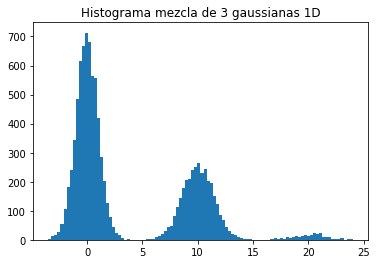

In [8]:
plt.hist(samples, bins=100)
plt.title(f'Histograma mezcla de {amount} gaussianas {dimension}D')
plt.show()

### Random 1D example

Para este caso se muestra una mezcla de las 3 gaussianas de 1 dimension, pero esta vez con parámetros generados aleatoriamente, tanto las medias como las matrices de covarianza.

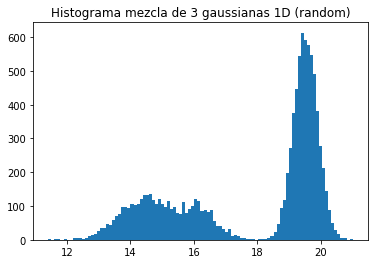

In [21]:
params = [[get_random_mus(dimension), get_random_covs(dimension)] for i in range(amount)]
normals = [multivariate_normal(i, j) for i, j in params]
unnormalized_weights = np.random.uniform(size=amount)
weights = unnormalized_weights / unnormalized_weights.sum()
samples = get_normal_sample(normals, weights, size=10000)
plt.hist(samples, bins=100)
plt.title(f'Histograma mezcla de {amount} gaussianas {dimension}D (random)')
plt.show()

## Fixed 2D example

Lo mismo pero en 2D con parámetros fijos para las medias, pero aleatorios para las covarianzas.

In [22]:
amount = 3
dimension = 2

In [23]:
params = [[[10, 12], get_random_covs(2)], [[15, 11], get_random_covs(2)], [[17, 18], get_random_covs(2)]]
normals = [multivariate_normal(i, j) for i, j in params]
unnormalized_weights = np.random.uniform(size=amount)
weights = unnormalized_weights / unnormalized_weights.sum()

In [24]:
samples = get_normal_sample(normals, weights, size=1000)

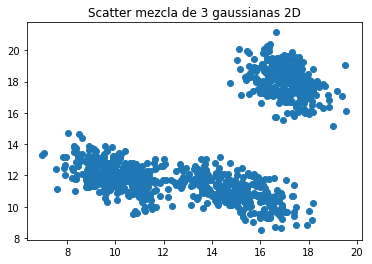

In [25]:
plt.scatter(samples[:, 0], samples[:, 1])
plt.title(f'Scatter mezcla de {amount} gaussianas {dimension}D')
plt.show()

### Random 2D example

Ahora se generan aleatoriamente tanto las medias como las covarianzas

In [26]:
amount = 3
dimension = 2

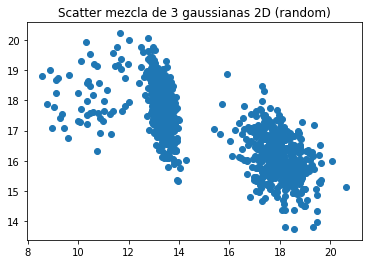

In [28]:
params = [[get_random_mus(dimension), get_random_covs(dimension)] for i in range(amount)]
normals = [multivariate_normal(i, j) for i, j in params]
unnormalized_weights = np.random.uniform(size=amount)
weights = unnormalized_weights / unnormalized_weights.sum()
samples = get_normal_sample(normals, weights, size=1000)
plt.scatter(samples[:, 0], samples[:, 1])
plt.title(f'Scatter mezcla de {amount} gaussianas {dimension}D (random)')
plt.show()

### Random 3D example

In [29]:
amount = 3
dimension = 3

In [30]:
params = [[get_random_mus(dimension), get_random_covs(dimension)] for i in range(amount)]
normals = [multivariate_normal(i, j) for i, j in params]
unnormalized_weights = np.random.uniform(size=amount)
weights = unnormalized_weights / unnormalized_weights.sum()
samples = get_normal_sample(normals, weights, size=1000)

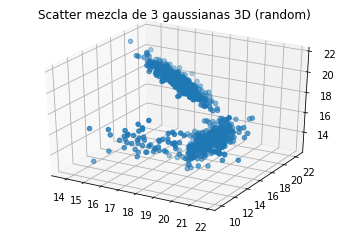

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2])
plt.title(f'Scatter mezcla de {amount} gaussianas {dimension}D (random)')
plt.show()

## Ecuaciones 1-13

Traspasar, en primer lugar, las ecuaciones en cuestión. Se considera en ciertos casos el índice pedido como entrada, en otros se asume que se usará después dado valores que corresponden al índice (ya viene esa información, no se pide)

In [32]:
def ln_pi(alphas, k):
    return digamma(alphas[k]) - digamma(alphas.sum())

In [33]:
def ln_precision(nu, D, W):
    rhs = D * np.log(2) + np.log(np.linalg.det(W))
    return sum([digamma((nu + 1 - i) / 2) for i in range(D)]) + rhs

In [34]:
ln_pi(np.array([1, 2]), 0), ln_precision(5, 3, [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

(-1.5, 4.128166852522013)

In [35]:
def eq_3(D, beta, nu, x, m, W):
    return D / beta + nu * (x - m).dot(W).dot(x - m)

In [36]:
x = np.array([1, 2])
m = np.array([4, 5])
w = np.diag([1, 2])

In [37]:
eq_3(3, 1, 4, x, m, w)

111.0

In [38]:
def log_ro(alphas, k, D, beta, nu, x, m, W):
    return ln_pi(alphas, k) + 1/2 * ln_precision(nu, D, W) - D/2 * np.log(2 * np.pi) - 1/2 * eq_3(D, beta, nu, x, m, W)

In [39]:
log_ro(np.array([1, 1]), 0, 3, 2, 2, x, m, w)

-31.372639096966317

In [40]:
def log_r(log_roes, k):
    return log_roes[k] - logsumexp(log_roes)

In [41]:
log_r([log_ro(np.array([1, 2]), 0, 3, 2, 2, x, m, w), log_ro(np.array([1, 2]), 1, 3, 2, 2, x, m, w)], 0)

-1.3132616875182244

Tuve una situación familiar un poco severa esta última semana con lo que solo sobreviví a los exámenes, no me pude asignar tiempo para esta tarea, tuve que priorizar a la familia. Perdón lo mediocre pero se me escapó de las manos. Entrego la primera parte y lo que alcancé a hacer del desarrollo de ecuaciones.